In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2019/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  3583
Number of Edges:  2477516


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

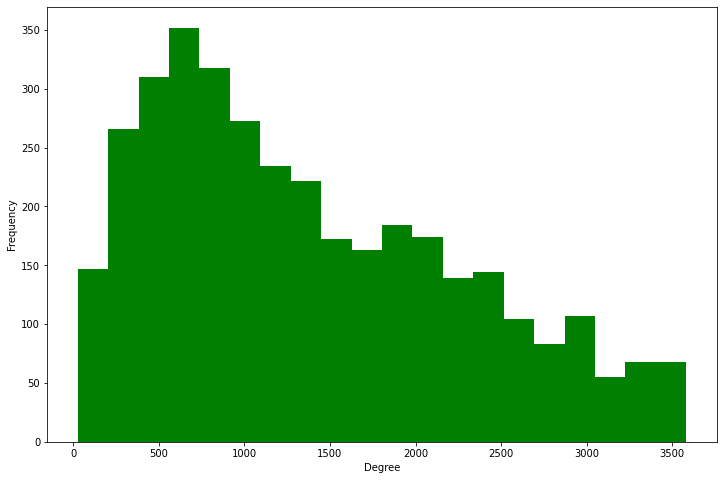

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

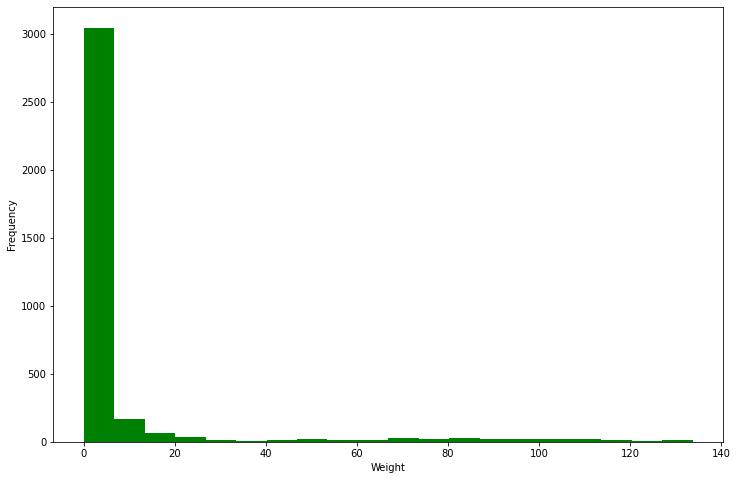

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

1382.9282723974322
26
3582


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

7.999833125529657
0.0002514263610869356
133.77506043902775


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'length': 3582, 'name': 3582, 'document': 3582, 'window': 3582, 'init': 3582, 'location': 3582, 'var': 3582, 'parent': 3581, 'top': 3581, 'self': 3581, 'frames': 3581, 'opener': 3581, 'null': 3579, 'push': 3554, 'Math': 3552, 'setTimeout': 3551, 'undefined': 3549, 'replace': 3549, 'type': 3548, 'prototype': 3537, 'addEventListener': 3534, 'function': 3533, 'slice': 3533, 'call': 3531, 'arguments': 3520, 'data': 3517, 'in': 3508, 'id': 3508, 'apply': 3507, 'string': 3505, 'value': 3503, 'navigator': 3499, 'createElement': 3499, 'join': 3497, 'object': 3495, 'Object': 3486, 'void': 3486, 'Array': 3486, 'toString': 3485, 'delete': 3482, 'height': 3481, 'width': 3480, 'Date': 3477, 'hasOwnProperty': 3477, 'src': 3473, 'instanceof': 3471, 'body': 3468, 'on': 3465, 'console': 3464, 'style': 3463, 'get': 3463, 'error': 3455, 'appendChild': 3448, 'removeEventListener': 3447, 'splice': 3446, 'userAgent': 3445, 'bind': 3441, 'number': 3440, 'JSON': 3435, 'open': 3429, 'forEach': 3429, 'log': 34

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 133.77506043902775, 'var': 133.70992167101696, 'window': 133.694178512715, 'name': 133.63112851754994, 'location': 133.396944202687, 'top': 133.286954839956, 'frames': 132.46208297069737, 'init': 131.29810463204615, 'self': 131.04677497340515, 'parent': 130.83824581761792, 'opener': 130.66413306256504, 'createElement': 129.45670631466882, 'null': 129.22453341069405, 'src': 128.06644425103886, 'length': 127.66456822357651, 'type': 124.92388550430307, 'push': 123.51973696934591, 'appendChild': 122.08605550720414, 'replace': 121.51617831931166, 'getElementsByTagName': 121.4568707088296, 'undefined': 120.97793250169212, 'id': 120.58941108210081, 'call': 120.46403636012002, 'setTimeout': 120.25095251909912, 'Date': 119.06384295522673, 'prototype': 118.71849917802992, 'body': 118.61266802050059, 'addEventListener': 118.5908422783096, 'Math': 118.41789962286084, 'join': 117.66650227250742, 'style': 116.96767237211091, 'navigator': 116.08434387390004, 'function': 116.0081906972247

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8304258076268854

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6139228720275176

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

50


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

171
2
75
2
3
1
3242
1
6
2
1
3
1
2
1
2
1
1
1
2
1
3
1
1
3
1
4
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
22


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)